# 디지털신호처리 (DSP) Midterm Exam
#### 이름 : 이연우
#### 학번 : 201810793
#### 학과 : 휴먼지능정보공학과

## - 중간고사 대체 과제물
다음 첨부한 perfect_pitch.wav를 이용하여 다음 과제를 해결하여 제출하세요. 각 문항에서는 반드시 답과 함께 "증명할 수 있는 코드"를 작성해야 합니다. 답만 있으면 정답으로 인정하지 않습니다.

예를 들어, 아래 3번 문제의 경우 귀로 들어보니 3개의 음이 포함되어 있다고만 하면 0점이고, 반드시 wave를 코드를 통해 분석하고 증명해야 합니다.

1. perfect_pitch.wav를 read하고 소리를 들어보세요.

2. perfect_pitch.wav의 framerate은?

3. perfect_pitch.wav에서는 몇 개의 음계가 포함되어 있는가?

4. spectrum 분석을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.

5. autocorrelation을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.

6. perfect_pitch를 분석해보고 디지털신호처리 관점에서 느낀점은? (코드 작성은 필요없는 문항임)

In [1]:
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from thinkdsp import decorate

In [3]:
if not os.path.exists('perfect_pitch.wav'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/28042__bcjordan__voicedownbew.wav

## 1. perfect_pitch.wav를 read하고 소리를 들어보세요.

In [4]:
from thinkdsp import read_wave, Wave

wave = read_wave('perfect_pitch.wav')
wave.normalize()
wave.make_audio()

오디오를 들어 봤을 때 5가지의 음이 시간 간격을 두고 들렸다.

## 2. perfect_pitch.wav의 framerate은?
Framerate : unit 시간 단위당 샘플의 수

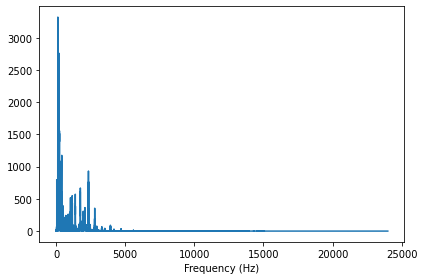

In [5]:
spectrum = wave.make_spectrum()
spectrum.plot()
decorate(xlabel = 'Frequency (Hz)')

In [6]:
wave.framerate

48000

24000Hz까지 측정이 가능한 것을 보아 Framerate는 48000개 라는 것을 알 수 있다.

#### ∴ Framerate의 개수는 48000 이다.

## 3. perfect_pitch.wav에서는 몇 개의 음계가 포함되어 있는가?
#### - Wave

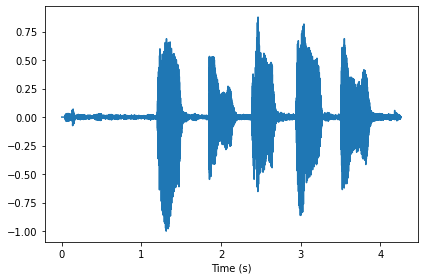

In [7]:
wave.plot()
decorate(xlabel = 'Time (s)')

#### - Spectrogram

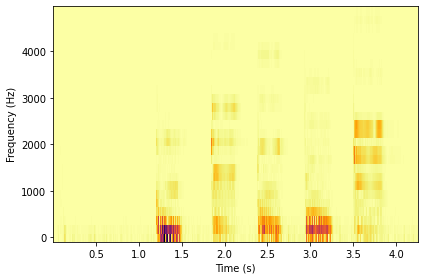

In [8]:
wave.make_spectrogram(256).plot(high = 5000)
decorate(xlabel = 'Time (s)', ylabel = 'Frequency (Hz)')

wave의 모양과 spectrogram을 보았을 때 5개의 구역에서 주파수(freq)와 진폭이 크다는 것을 알 수 있다. 1번 문제에서 오디오로 들어 봤을 때 5개의 음계로 들린다고 예측하였으며 그래프를 통해 5개의 진폭을 확인 할 수 있으므로 perfect_pitch.wav에는 5개의 음계가 포함되어 있다.

#### ∴ 5개의 음계

### 4. spectrum 분석을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.
#### -  perfect_pitch의 전체 스팩트럼(spectrum) 확대

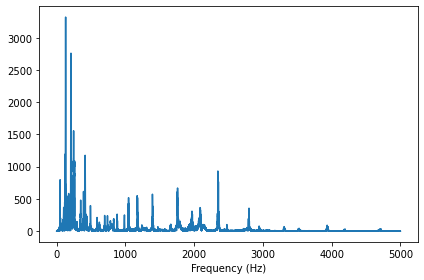

In [9]:
spectrum = wave.make_spectrum()
spectrum.plot(high = 5000)
decorate(xlabel = 'Frequency (Hz)')

perfect_pitch의 전체 스펙트럼을 봤을 때 음을 추정하기 어려워 3번의 그래프를 보고 음계가 발생하는 부분을 시간대로 잘라 총 5개의 음을 각각 찾기로 하였다. 

###  - 첫번째 음
1.1 ~ 1.7초

In [10]:
segment1 = wave.segment(start = 1.1, duration = 0.6) 
segment1.make_audio()

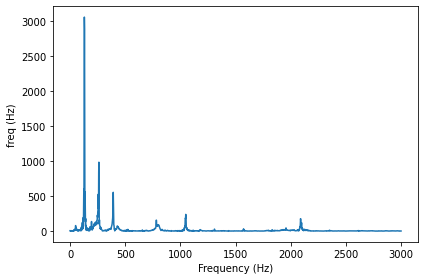

In [11]:
spectrum1 = segment1.make_spectrum()
spectrum1.plot(high = 3000)
decorate(xlabel='Frequency (Hz)', ylabel = 'freq (Hz)')

In [12]:
spectrum1.peaks()[:5] #(가장 높은 점, 주파수)

[(3060.8166880884096, 130.0),
 (2887.5597694212697, 131.66666666666669),
 (1881.8535153628054, 128.33333333333334),
 (1517.7198894053872, 133.33333333333334),
 (985.413293846025, 261.6666666666667)]

스펙트럼을 눈으로 보았을때 130Hz쯤이 Foundation Freq인 것을 알 수 있다. peaks()를 사용해 폭이 큰 순서대로 5개의 peak를 보았을 때 130hz가 가장 높은 점의 주파수(Fundation Freq)인 것을 알 수 있다.


#### 130Hz와 가장 유사한 음은 131Hz인 C3(도)이다.

### - 두번째 음
1.7 ~ 2.3초

In [13]:
segment2 = wave.segment(start = 1.7, duration = 0.6) 
segment2.make_audio()

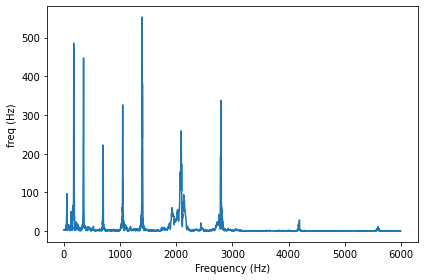

In [14]:
spectrum2 = segment2.make_spectrum()
spectrum2.plot(high = 6000)
decorate(xlabel='Frequency (Hz)', ylabel = 'freq (Hz)')

In [15]:
spectrum2.peaks()[:5] #(가장 높은 점, 주파수)

[(553.0056328556757, 1393.3333333333335),
 (485.3676279147031, 175.0),
 (447.49136984544225, 350.0),
 (441.745581429592, 1395.0),
 (412.6136917674421, 176.66666666666669)]

스펙트럼을 눈으로 보았을때 1400Hz쯤이 Foundation Freq인 것을 알 수 있다. peaks()를 사용해 peak를 보았을 때 1393hz가 가장 높은 점의 주파수(Fundation Freq)인 것을 알 수 있다.

#### 1393.3Hz와 가장 유사한 음은 1397Hz인 F6(파)이다.

### - 세번째 음
2.3 ~ 2.9초

In [16]:
segment3 = wave.segment(start = 2.3, duration = 0.6)
segment3.make_audio()

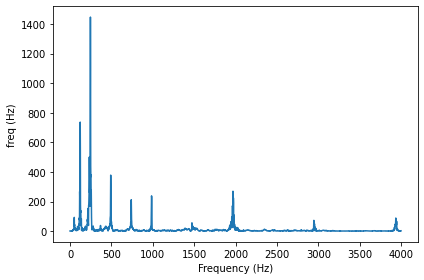

In [17]:
spectrum3 = segment3.make_spectrum()
spectrum3.plot(high = 4000) 
decorate(xlabel='Frequency (Hz)', ylabel = 'freq (Hz)') 

In [18]:
spectrum3.peaks()[:5] #(가장 높은 점, 주파수)

[(1447.2326122061029, 246.66666666666669),
 (1144.7807666534563, 245.0),
 (1110.166915828388, 248.33333333333334),
 (737.0560052591851, 123.33333333333334),
 (630.7209103128624, 121.66666666666667)]

스펙트럼을 눈으로 보았을때 250Hz이 Foundation Freq인 것을 알 수 있다. peaks()를 사용해 peak를 보았을 때 246hz가 가장 높은 점의 주파수(Fundation Freq)인 것을 알 수 있다.

#### 246.6Hz와 가장 유사한 음은 247Hz인 B3(시)이다.

### - 네번째 음
2.9 ~ 3.5초

In [19]:
segment4 = wave.segment(start = 2.9, duration = 0.6)
segment4.make_audio()

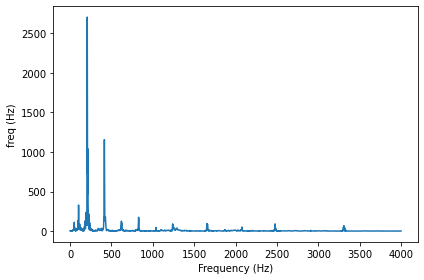

In [20]:
spectrum4 = segment4.make_spectrum()
spectrum4.plot(high = 4000)
decorate(xlabel='Frequency (Hz)', ylabel = 'freq (Hz)')

In [21]:
spectrum4.peaks()[:5] #(가장 높은 점, 주파수)

[(2702.397701849342, 208.33333333333334),
 (2174.0017832801927, 206.66666666666669),
 (1408.9149175131329, 210.0),
 (1154.9702047268559, 415.0),
 (1041.812689933714, 213.33333333333334)]

스펙트럼을 눈으로 보았을때 210Hz 가량이 Foundation Freq인 것을 알 수 있다. peaks()를 사용해 peak를 보았을 때 208hz가 가장 높은 점의 주파수(Foundation Freq)인 것을 알 수 있다.

#### 208Hz는 G#3(솔#) 음이다.

### - 다섯번째 음
3.5초 ~ 4.1초

In [22]:
segment5 = wave.segment(start = 3.5, duration = 0.6)
segment5.make_audio()

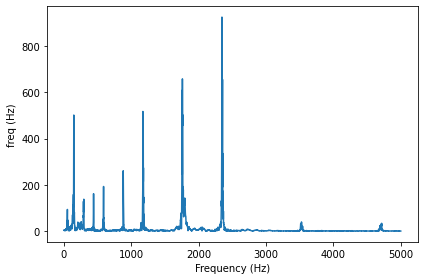

In [23]:
spectrum5 = segment5.make_spectrum()
spectrum5.plot(high = 5000)
decorate(xlabel='Frequency (Hz)', ylabel = 'freq (Hz)')

In [24]:
spectrum5.peaks()[:5] #(가장 높은 점, 주파수)

[(924.4137812956853, 2345.0),
 (657.511008090403, 1758.3333333333335),
 (655.1775238590684, 2353.3333333333335),
 (608.2203141040377, 1755.0),
 (587.1781594198369, 2351.666666666667)]

스펙트럼을 눈으로 보았을때 2300Hz 가량이 Fundamental Freq인 것을 알 수 있다. peaks()를 사용해 peak를 보았을 때 2345hz가 가장 높은 점의 주파수(Foundation Freq)인 것을 알 수 있다.

#### 2345Hz와 가장 유사한 음은 2349Hz는 D7(레)이다.

#### ∴ Spectrum 분석을 통해 시간 순대로 음을 찾아본 결과 [131Hz, C3(도)] [1397Hz, F6(파)] [247Hz, B3(시)] [208Hz, G#3(솔#)] [2349Hz, D7(레)] 가 나왔다.

### 5. autocorrelation을 이용하여 perfect_pitch에 포함되어 있는 음을 모두 순서대로 찾으세요.
#### Fundamental(pitch)를 추정할 함수 'estimate_fundamental'

In [25]:
def estimate_fundamental(segment, low = 70, high = 24000):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

In [26]:
def autocorr(wave):
    lags = range(len(wave.ys) // 2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

In [27]:
def serial_corr(wave, lag = 1):
    n = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:n - lag]
    corr = np.corrcoef(y1, y2) [0, 1]
    return corr

#### 4번 문제에서 사용했던 5개의 segment를 활용해 Autocorrelation을 이용하여 음을 찾아보았다.
###  - 첫번째 음계
1.1 ~ 1.7초

In [28]:
freq1 = estimate_fundamental(segment1)
freq1

130.43478260869566

#### 130.4Hz와 가장 유사한 음은 131Hz인 C3(도)이다.
### - 두번째 음
1.7 ~ 2.3초

In [29]:
freq2 = estimate_fundamental(segment2)
freq2

174.54545454545456

#### 174.5Hz와 가장 유사한 음은 175Hz인 F3(파)이다.
### - 세번째 음
2.3 ~ 2.9초

In [30]:
freq3 = estimate_fundamental(segment3)
freq3

123.07692307692307

#### 123.0Hz와 가장 유사한 음은 123.5Hz인 B2(시)이다.
### - 네번째 음
2.9 ~ 3.5초

In [31]:
freq4 = estimate_fundamental(segment4)
freq4

103.8961038961039

#### 103.8Hz와 가장 유사한 음은 104Hz인 G#2(솔#)이다.
### - 다섯번째 음
3.5초 ~ 4.1초

In [32]:
freq5 = estimate_fundamental(segment5)
freq5

146.78899082568807

#### 146.7Hz와 가장 유사한 음은 147Hz인 D3(레)이다.
#### ∴ Autocorrelation을 이용하여 시간 순대로 음을 찾아본 결과 [131Hz, C3(도)] [175Hz, F3(파)] [123Hz, B2(시)] [103Hz, G#2(솔#)] [146Hz, D3(레)] 가 나왔다.

### 6. perfect_pitch를 분석해보고 디지털신호처리 관점에서 느낀점은? (코드 작성은 필요없는 문항임)

prefect_pitch.wav는 디지털신호처리 공부를 하는데 좋은 자료라고 생각한다. 만약 일상생활에서의 녹음본을 사용했다면 노이즈가 많이 낀 상태라 분석하기에 큰 어려움을 겪었을 것이다. 그에비해 perfect_pitch는 잡음이 별로없고 음의 텀이 있는 음성으로 만든 파일이라 분석하기에 편했다.

Spectrum 분석 결과 : [131Hz, C3(도)] [1397Hz, F6(파)] [247Hz, B3(시)] [208Hz, G#3(솔#)] [2349Hz, D7(레)]

Autocorrealtion 결과 : [131Hz, C3(도)] [175Hz, F3(파)] [123Hz, B2(시)] [103Hz, G#2(솔#)] [146Hz, D3(레)]

둘을 비교했을때 음계의 단위는 같지만 옥타브가 다르다는 것을 볼 수 있다. 나는 이러한 일이 Autocorrelation 상관관계로 인해 생긴 오차라고 생각한다. 컴퓨터로 측정한 wave는 디지털 시그널로 자세히보면 연속적이지 않아서 오차가 존재할 수 있다. 옥타브는 배제하고 음계의 단위로만 분석 결과를 봤을 때 Autocorrealtion이 좀 더 오차가 적게 측정이 된것을 볼 수 있다. 또한 Autocorrealtion으로 분석했을 때는 함수를 이용해 쉽게 음을 구할 수 있어 쉽고 간편하게 느껴졌다. 하지만 옥타브를 포함한 정확한 음은 자세한 Spectrum 분석을 통해 알 수 있었다.

## 교수님의 피드백
- 4번 :  fundamental freq. 개념으로 접근해야 함.

- 5번 : lag- corr의 주기성을 확인할 수 있어야 함